# Spark DataFrames

Use Spakr DataFrames rather than RDDs whenever possible. In general, Spark DataFrames are more performant, and the performance is consistent across differnet languagge APIs. Unlike RDDs which are executed on the fly, Spakr DataFrames are compiled using the Catalyst optimiser and an optimal execution path executed by the engine. Since all langugaes compile to the same execution code, there is no difference across languages (unless you use user-defined funcitons UDF).

Start spark

In [1]:
%%spark

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
150,application_1522938745830_0107,pyspark,idle,Link,Link,✔


SparkSession available as 'spark'.


In [2]:
spark.version

u'2.2.0.2.6.3.0-235'

Import native spark functions

In [3]:
import pyspark.sql.functions as F

Import variables to specify schema

In [4]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

## RDDs and DataFrames

In [5]:
data = [('ann', 'spring', 'math', 98),
        ('ann', 'fall', 'bio', 50),
        ('bob', 'spring', 'stats', 100),
        ('bob', 'fall', 'stats', 92),
        ('bob', 'summer', 'stats', 100),
        ('charles', 'spring', 'stats', 88),
        ('charles', 'fall', 'bio', 100)   
       ]

In [6]:
rdd = sc.parallelize(data)

In [7]:
rdd.take(3)

[('ann', 'spring', 'math', 98), ('ann', 'fall', 'bio', 50), ('bob', 'spring', 'stats', 100)]

In [8]:
df = spark.createDataFrame(rdd, ['name', 'semester', 'subject', 'score'])

In [9]:
df.show()

+-------+--------+-------+-----+
|   name|semester|subject|score|
+-------+--------+-------+-----+
|    ann|  spring|   math|   98|
|    ann|    fall|    bio|   50|
|    bob|  spring|  stats|  100|
|    bob|    fall|  stats|   92|
|    bob|  summer|  stats|  100|
|charles|  spring|  stats|   88|
|charles|    fall|    bio|  100|
+-------+--------+-------+-----+

In [10]:
df.show(3)

+----+--------+-------+-----+
|name|semester|subject|score|
+----+--------+-------+-----+
| ann|  spring|   math|   98|
| ann|    fall|    bio|   50|
| bob|  spring|  stats|  100|
+----+--------+-------+-----+
only showing top 3 rows

In [11]:
df.rdd.take(3)

[Row(name=u'ann', semester=u'spring', subject=u'math', score=98), Row(name=u'ann', semester=u'fall', subject=u'bio', score=50), Row(name=u'bob', semester=u'spring', subject=u'stats', score=100)]

In [12]:
df.describe()

DataFrame[summary: string, name: string, semester: string, subject: string, score: string]

## Converstion to and from pandas

Make sure your data set can fit into memory before converting to `pandas`.

In [13]:
pdf = df.toPandas()
pdf

      name semester subject  score
0      ann   spring    math     98
1      ann     fall     bio     50
2      bob   spring   stats    100
3      bob     fall   stats     92
4      bob   summer   stats    100
5  charles   spring   stats     88
6  charles     fall     bio    100

In [14]:
spark.createDataFrame(pdf).show()

+-------+--------+-------+-----+
|   name|semester|subject|score|
+-------+--------+-------+-----+
|    ann|  spring|   math|   98|
|    ann|    fall|    bio|   50|
|    bob|  spring|  stats|  100|
|    bob|    fall|  stats|   92|
|    bob|  summer|  stats|  100|
|charles|  spring|  stats|   88|
|charles|    fall|    bio|  100|
+-------+--------+-------+-----+

## Schemas

In [15]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- semester: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- score: long (nullable = true)

## Data manipulation

### Selecting columns

In [16]:
df.select(['name', 'subject', 'score']).show()

+-------+-------+-----+
|   name|subject|score|
+-------+-------+-----+
|    ann|   math|   98|
|    ann|    bio|   50|
|    bob|  stats|  100|
|    bob|  stats|   92|
|    bob|  stats|  100|
|charles|  stats|   88|
|charles|    bio|  100|
+-------+-------+-----+

### Filtering rows

In [17]:
df.filter(df['score'] > 90).show()

+-------+--------+-------+-----+
|   name|semester|subject|score|
+-------+--------+-------+-----+
|    ann|  spring|   math|   98|
|    bob|  spring|  stats|  100|
|    bob|    fall|  stats|   92|
|    bob|  summer|  stats|  100|
|charles|    fall|    bio|  100|
+-------+--------+-------+-----+

### Mutating values

Using select

In [18]:
df.select(df['name'], df['semester'], df['subject'], df['score'], 
          (df['score'] - 10).alias('adj_score')).show()

+-------+--------+-------+-----+---------+
|   name|semester|subject|score|adj_score|
+-------+--------+-------+-----+---------+
|    ann|  spring|   math|   98|       88|
|    ann|    fall|    bio|   50|       40|
|    bob|  spring|  stats|  100|       90|
|    bob|    fall|  stats|   92|       82|
|    bob|  summer|  stats|  100|       90|
|charles|  spring|  stats|   88|       78|
|charles|    fall|    bio|  100|       90|
+-------+--------+-------+-----+---------+

Using `withColumn`

In [19]:
df.withColumn('sqrt_socre', df['score']/2).show()

+-------+--------+-------+-----+----------+
|   name|semester|subject|score|sqrt_socre|
+-------+--------+-------+-----+----------+
|    ann|  spring|   math|   98|      49.0|
|    ann|    fall|    bio|   50|      25.0|
|    bob|  spring|  stats|  100|      50.0|
|    bob|    fall|  stats|   92|      46.0|
|    bob|  summer|  stats|  100|      50.0|
|charles|  spring|  stats|   88|      44.0|
|charles|    fall|    bio|  100|      50.0|
+-------+--------+-------+-----+----------+

### Sorting

In [20]:
df.sort(df['score']).show()

+-------+--------+-------+-----+
|   name|semester|subject|score|
+-------+--------+-------+-----+
|    ann|    fall|    bio|   50|
|charles|  spring|  stats|   88|
|    bob|    fall|  stats|   92|
|    ann|  spring|   math|   98|
|    bob|  summer|  stats|  100|
|charles|    fall|    bio|  100|
|    bob|  spring|  stats|  100|
+-------+--------+-------+-----+

In [21]:
df.sort(df['score'].desc()).show()

+-------+--------+-------+-----+
|   name|semester|subject|score|
+-------+--------+-------+-----+
|    bob|  summer|  stats|  100|
|    bob|  spring|  stats|  100|
|charles|    fall|    bio|  100|
|    ann|  spring|   math|   98|
|    bob|    fall|  stats|   92|
|charles|  spring|  stats|   88|
|    ann|    fall|    bio|   50|
+-------+--------+-------+-----+

Alternative syntax

In [22]:
df.sort(df.score.desc()).show()

+-------+--------+-------+-----+
|   name|semester|subject|score|
+-------+--------+-------+-----+
|    bob|  spring|  stats|  100|
|charles|    fall|    bio|  100|
|    bob|  summer|  stats|  100|
|    ann|  spring|   math|   98|
|    bob|    fall|  stats|   92|
|charles|  spring|  stats|   88|
|    ann|    fall|    bio|   50|
+-------+--------+-------+-----+

### Summarizing

In [23]:
df.agg(
    {'score': 'mean'}
).show()

+-----------------+
|       avg(score)|
+-----------------+
|89.71428571428571|
+-----------------+

In [24]:
df.agg(
    F.mean(df.score).alias('avg'),
    F.min(df.score).alias('min'),
    F.max(df.score).alias('max')
).show()

+-----------------+---+---+
|              avg|min|max|
+-----------------+---+---+
|89.71428571428571| 50|100|
+-----------------+---+---+

### Split-Apply-Combine

In [25]:
df.groupby('name').agg({'score': 'mean', 'subject': 'count'}).show()

+-------+-----------------+--------------+
|   name|       avg(score)|count(subject)|
+-------+-----------------+--------------+
|charles|             94.0|             2|
|    ann|             74.0|             2|
|    bob|97.33333333333333|             3|
+-------+-----------------+--------------+

### Join

In [26]:
meta = [('ann', 'female', 23),
        ('bob', 'male', 19),
        ('charles', 'male', 22),
        ('daivd', 'male', 23)
       ]

In [27]:
schema = StructType([
    StructField('name', StringType(), True),
    StructField('sex', StringType(), True),
    StructField('age', IntegerType(), True)
])

In [28]:
df_meta = spark.createDataFrame(meta, schema)

In [29]:
df_meta.printSchema()

root
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: integer (nullable = true)

In [30]:
df_meta.show()

+-------+------+---+
|   name|   sex|age|
+-------+------+---+
|    ann|female| 23|
|    bob|  male| 19|
|charles|  male| 22|
|  daivd|  male| 23|
+-------+------+---+

In [31]:
df.join(df_meta, on='name', how='inner').show()

+-------+--------+-------+-----+------+---+
|   name|semester|subject|score|   sex|age|
+-------+--------+-------+-----+------+---+
|charles|  spring|  stats|   88|  male| 22|
|charles|    fall|    bio|  100|  male| 22|
|    ann|  spring|   math|   98|female| 23|
|    ann|    fall|    bio|   50|female| 23|
|    bob|  spring|  stats|  100|  male| 19|
|    bob|    fall|  stats|   92|  male| 19|
|    bob|  summer|  stats|  100|  male| 19|
+-------+--------+-------+-----+------+---+

In [32]:
df_full = df.join(df_meta, on='name', how='rightouter')
df_full.drop()

DataFrame[name: string, semester: string, subject: string, score: bigint, sex: string, age: int]

In [33]:
df_full.groupby('sex').mean().show()

+------+----------+------------------+
|   sex|avg(score)|          avg(age)|
+------+----------+------------------+
|female|      74.0|              23.0|
|  male|      96.0|20.666666666666668|
+------+----------+------------------+

In [34]:
df_full.groupby('sex').pivot('subject').agg(F.mean('age')).show()

+------+----+----+----+-----+
|   sex|null| bio|math|stats|
+------+----+----+----+-----+
|female|null|23.0|23.0| null|
|  male|23.0|22.0|null|19.75|
+------+----+----+----+-----+

In [35]:
(
    df_full.
    dropna().
    groupby('sex').
    pivot('subject').
    agg(F.mean('age')).
    show()
)

+------+----+----+-----+
|   sex| bio|math|stats|
+------+----+----+-----+
|female|23.0|23.0| null|
|  male|22.0|null|19.75|
+------+----+----+-----+

## Using SQL

In [36]:
df_full.createOrReplaceTempView('table')

### Select columns

In [37]:
spark.sql('select name, age from table').show()

+-------+---+
|   name|age|
+-------+---+
|charles| 22|
|charles| 22|
|    ann| 23|
|    ann| 23|
|  daivd| 23|
|    bob| 19|
|    bob| 19|
|    bob| 19|
+-------+---+

### Filter rows

In [38]:
spark.sql('select name, age from table where age > 20').show()

+-------+---+
|   name|age|
+-------+---+
|charles| 22|
|charles| 22|
|    ann| 23|
|    ann| 23|
|  daivd| 23|
+-------+---+

### Mutate

In [39]:
spark.sql('select name, age + 2 as adj_age from table').show()

+-------+-------+
|   name|adj_age|
+-------+-------+
|charles|     24|
|charles|     24|
|    ann|     25|
|    ann|     25|
|  daivd|     25|
|    bob|     21|
|    bob|     21|
|    bob|     21|
+-------+-------+

### Sort

In [40]:
spark.sql('select name, age from table order by age desc').show()

+-------+---+
|   name|age|
+-------+---+
|  daivd| 23|
|    ann| 23|
|    ann| 23|
|charles| 22|
|charles| 22|
|    bob| 19|
|    bob| 19|
|    bob| 19|
+-------+---+

### Summary

In [41]:
spark.sql('select mean(age) from table').show()

+--------+
|avg(age)|
+--------+
|   21.25|
+--------+

### Split-apply-combine


In [42]:
q = '''
select sex, mean(score), min(age)
from table
group by sex
'''

In [43]:
spark.sql(q).show()

+------+----------+--------+
|   sex|avg(score)|min(age)|
+------+----------+--------+
|female|      74.0|      23|
|  male|      96.0|      19|
+------+----------+--------+

## Using SQL magic

In [44]:
%%sql

select sex, mean(score), min(age)
from table
group by sex

Output()

### Capture output locally (i.e. not sent to livy and cluster)

In [45]:
%%sql -q -o df1

select sex, score, age from table

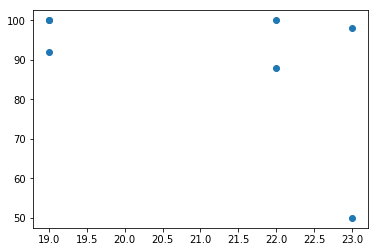

In [46]:
%%local

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x='age', y='score', data=df1)
plt.show()

## User Definted Functions (UDF) verus `pyspark.sql.functions`

**Version 1**: Using a User Defined Funciton (UDF)

Note: Using a Python UDF is not efficient.

In [47]:
@F.udf
def score_to_grade(g):
    if g > 90:
        return 'A'
    elif g > 80:
        return 'B'
    else:
        return 'C'

In [48]:
df.withColumn('grade', score_to_grade(df['score'])).show()

+-------+--------+-------+-----+-----+
|   name|semester|subject|score|grade|
+-------+--------+-------+-----+-----+
|    ann|  spring|   math|   98|    A|
|    ann|    fall|    bio|   50|    C|
|    bob|  spring|  stats|  100|    A|
|    bob|    fall|  stats|   92|    A|
|    bob|  summer|  stats|  100|    A|
|charles|  spring|  stats|   88|    B|
|charles|    fall|    bio|  100|    A|
+-------+--------+-------+-----+-----+

**Version 2**: Using built-in fucntions.

See [list of functions](http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#module-pyspark.sql.functions) available.

More performant version

In [49]:
score_to_grade_fast = (
    F.
    when(F.col('score') > 90, 'A').
    when(F.col('score') > 80, 'B').
    otherwise('C')
)

In [50]:
df.withColumn('grade_fast', score_to_grade_fast).show()

+-------+--------+-------+-----+----------+
|   name|semester|subject|score|grade_fast|
+-------+--------+-------+-----+----------+
|    ann|  spring|   math|   98|         A|
|    ann|    fall|    bio|   50|         C|
|    bob|  spring|  stats|  100|         A|
|    bob|    fall|  stats|   92|         A|
|    bob|  summer|  stats|  100|         A|
|charles|  spring|  stats|   88|         B|
|charles|    fall|    bio|  100|         A|
+-------+--------+-------+-----+----------+

### Vectorized UDFs

The current version of `pyspark 2.3` has support for vectorized UDFs, which can make Python functions using `numpy` or `pandas` functionality much faster. Unfortunately, the Docker version of `pyspark 2.2` does not support vectorized UDFs.

If you have access to `pysark 2.3` see [Introducing Pandas UDF for PySpark: How to run your native Python code with PySpark, fast](https://databricks.com/blog/2017/10/30/introducing-vectorized-udfs-for-pyspark.html) and the linked [benchmarking notebook](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/1281142885375883/2174302049319883/7729323681064935/latest.html).

## I/O options

### CSV

In [51]:
df_full.write.mode('overwrite').option('header', 'true').csv('foo.csv')

In [52]:
foo = spark.read.option('header', 'true').csv('foo.csv')

In [53]:
foo.show()

+-------+--------+-------+-----+------+---+
|   name|semester|subject|score|   sex|age|
+-------+--------+-------+-----+------+---+
|    bob|  spring|  stats|  100|  male| 19|
|    bob|    fall|  stats|   92|  male| 19|
|    bob|  summer|  stats|  100|  male| 19|
|charles|  spring|  stats|   88|  male| 22|
|charles|    fall|    bio|  100|  male| 22|
|    ann|  spring|   math|   98|female| 23|
|    ann|    fall|    bio|   50|female| 23|
|  daivd|    null|   null| null|  male| 23|
+-------+--------+-------+-----+------+---+

### JSON

In [54]:
df_full.write.mode('overwrite').json('foo.json')

In [55]:
foo = spark.read.json('foo.json')

In [56]:
foo.show()

+---+-------+-----+--------+------+-------+
|age|   name|score|semester|   sex|subject|
+---+-------+-----+--------+------+-------+
| 19|    bob|  100|  spring|  male|  stats|
| 19|    bob|   92|    fall|  male|  stats|
| 19|    bob|  100|  summer|  male|  stats|
| 22|charles|   88|  spring|  male|  stats|
| 22|charles|  100|    fall|  male|    bio|
| 23|    ann|   98|  spring|female|   math|
| 23|    ann|   50|    fall|female|    bio|
| 23|  daivd| null|    null|  male|   null|
+---+-------+-----+--------+------+-------+

### Parquet

This is an efficient columnar store.

In [57]:
df_full.write.mode('overwrite').parquet('foo.parquet')

In [58]:
foo = spark.read.parquet('foo.parquet')

In [59]:
foo.show()

+-------+--------+-------+-----+------+---+
|   name|semester|subject|score|   sex|age|
+-------+--------+-------+-----+------+---+
|    bob|  spring|  stats|  100|  male| 19|
|    bob|    fall|  stats|   92|  male| 19|
|    bob|  summer|  stats|  100|  male| 19|
|charles|  spring|  stats|   88|  male| 22|
|charles|    fall|    bio|  100|  male| 22|
|    ann|  spring|   math|   98|female| 23|
|    ann|    fall|    bio|   50|female| 23|
|  daivd|    null|   null| null|  male| 23|
+-------+--------+-------+-----+------+---+

## Random numbers

In [60]:
foo.withColumn('uniform', F.rand(seed=123)).show()

+-------+--------+-------+-----+------+---+-------------------+
|   name|semester|subject|score|   sex|age|            uniform|
+-------+--------+-------+-----+------+---+-------------------+
|    bob|  spring|  stats|  100|  male| 19| 0.5029534413816527|
|    bob|    fall|  stats|   92|  male| 19| 0.9867496419260051|
|    bob|  summer|  stats|  100|  male| 19| 0.8209632961670508|
|charles|  spring|  stats|   88|  male| 22|  0.839067819363327|
|charles|    fall|    bio|  100|  male| 22| 0.3737326850860542|
|    ann|  spring|   math|   98|female| 23|0.45650488329285255|
|    ann|    fall|    bio|   50|female| 23| 0.1729393778824495|
|  daivd|    null|   null| null|  male| 23| 0.5760115975887162|
+-------+--------+-------+-----+------+---+-------------------+

In [61]:
foo.withColumn('normal', F.randn(seed=123)).show()

+-------+--------+-------+-----+------+---+--------------------+
|   name|semester|subject|score|   sex|age|              normal|
+-------+--------+-------+-----+------+---+--------------------+
|    bob|  spring|  stats|  100|  male| 19|0.001988081602007817|
|    bob|    fall|  stats|   92|  male| 19| 0.32765099517752727|
|    bob|  summer|  stats|  100|  male| 19| 0.35989602440312274|
|charles|  spring|  stats|   88|  male| 22|  0.3801966195174709|
|charles|    fall|    bio|  100|  male| 22| -2.1726586720908876|
|    ann|  spring|   math|   98|female| 23| -0.7484125450184252|
|    ann|    fall|    bio|   50|female| 23|  -1.229237021920563|
|  daivd|    null|   null| null|  male| 23|  0.2856848655347919|
+-------+--------+-------+-----+------+---+--------------------+

## Indexing with row numbers

Note that `monotonically_increasing_id` works over partitions, so while numbers are guaranteed to be unique and increasing, they may not be consecutive.

In [62]:
foo.withColumn('index', F.monotonically_increasing_id()).show()

+-------+--------+-------+-----+------+---+-----+
|   name|semester|subject|score|   sex|age|index|
+-------+--------+-------+-----+------+---+-----+
|    bob|  spring|  stats|  100|  male| 19|    0|
|    bob|    fall|  stats|   92|  male| 19|    1|
|    bob|  summer|  stats|  100|  male| 19|    2|
|charles|  spring|  stats|   88|  male| 22|    3|
|charles|    fall|    bio|  100|  male| 22|    4|
|    ann|  spring|   math|   98|female| 23|    5|
|    ann|    fall|    bio|   50|female| 23|    6|
|  daivd|    null|   null| null|  male| 23|    7|
+-------+--------+-------+-----+------+---+-----+

## Example: Word counting in a DataFrame

There are 2 text files in the `/data/texts` directory. We will read both in at once.

In [63]:
hadoop = sc._jvm.org.apache.hadoop

fs = hadoop.fs.FileSystem
conf = hadoop.conf.Configuration() 
path = hadoop.fs.Path('/data/texts')

for f in fs.get(conf).listStatus(path):
    print f.getPath()

hdfs://vcm-2167.oit.duke.edu:8020/data/texts/Portrait.txt
hdfs://vcm-2167.oit.duke.edu:8020/data/texts/Ulysses.txt

In [64]:
text = spark.read.text('/data/texts')

In [65]:
text.show(10)

+--------------------+
|               value|
+--------------------+
|                    |
|The Project Guten...|
|                    |
|This eBook is for...|
|no restrictions w...|
|it under the term...|
|eBook or online a...|
|                    |
|                    |
|      Title: Ulysses|
+--------------------+
only showing top 10 rows

Remove blank lines

In [66]:
text = text.filter(text['value'] != '')
text.show(10)

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|This eBook is for...|
|no restrictions w...|
|it under the term...|
|eBook or online a...|
|      Title: Ulysses|
| Author: James Joyce|
|Release Date: Aug...|
|Last Updated: Aug...|
|   Language: English|
+--------------------+
only showing top 10 rows

### Using built-in functions to process a column of strings

Note: This is more efficient than using a Python UDF.

In [67]:
from string import punctuation

def process(col):
    col = F.lower(col)                      # convert to lowercase
    col = F.translate(col, punctuation, '') # remove punctuation
    col = F.trim(col)                       # remove leading and traling blank space
    col = F.split(col, '\s')                # split on blank space
    col = F.explode(col)                    # give each iterable in row its owwn row
    return col

In [68]:
words = text.withColumn('value', process(text.value))
words.show(20)

+---------+
|    value|
+---------+
|      the|
|  project|
|gutenberg|
|    ebook|
|       of|
|  ulysses|
|       by|
|    james|
|    joyce|
|     this|
|    ebook|
|       is|
|      for|
|      the|
|      use|
|       of|
|   anyone|
| anywhere|
|       at|
|       no|
+---------+
only showing top 20 rows

In [69]:
counts = words.groupby('value').count()

In [70]:
counts.cache()

DataFrame[value: string, count: bigint]

In [71]:
counts.show(20)

+-----------+-----+
|      value|count|
+-----------+-----+
|     online|    8|
|      those|  403|
|      still|  272|
|   tripping|    5|
|        art|   66|
|        few|  110|
|       some|  416|
|     waters|   47|
|   tortured|    5|
|     slaver|    1|
|      inner|   21|
|       guts|   14|
|       hope|   79|
|     —billy|    1|
|  squealing|    3|
|     deftly|   10|
|     ceylon|    4|
|ineluctably|    4|
|     filing|    3|
|       foxy|    5|
+-----------+-----+
only showing top 20 rows

In [72]:
counts.sort(counts['count'].desc()).show(20)

+-----+-----+
|value|count|
+-----+-----+
|  the|21063|
|   of|11510|
|  and|10611|
|    a| 8500|
|   to| 7033|
|   in| 6555|
|   he| 5835|
|  his| 5069|
| that| 3537|
|   it| 3204|
|  was| 3192|
| with| 3170|
|    i| 2982|
|   on| 2662|
|  you| 2650|
|  for| 2500|
|  him| 2225|
|  her| 2098|
|   is| 1892|
| said| 1821|
+-----+-----+
only showing top 20 rows

In [73]:
counts.sort(counts['count']).show(20)

+-----------------+-----+
|            value|count|
+-----------------+-----+
|          incited|    1|
|     emancipation|    1|
|        overcloud|    1|
|         differed|    1|
|      fruitlessly|    1|
|          outboro|    1|
|            —duck|    1|
|     stonecutting|    1|
|      lectureroom|    1|
|     rainfragrant|    1|
|           lapide|    1|
|         end—what|    1|
|        shielding|    1|
|           breezy|    1|
|        chemistry|    1|
|        —tarentum|    1|
|           hockey|    1|
|            cable|    1|
|         plashing|    1|
|peacocktwittering|    1|
+-----------------+-----+
only showing top 20 rows

In [74]:
spark.stop()